In [1]:
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import uniform,norm,t,binom,expon,chi2,gamma,poisson,beta,dirichlet
from scipy.stats import multivariate_normal as multi_norm
from sklearn.linear_model import LinearRegression as Linear
from scipy.optimize import brentq,minimize
from scipy.special import perm,comb
import time
import pandas as pd
import qmcpy as qp

**15.8**

In [2]:
def draw():
    select=np.append([0,1],np.random.choice(np.arange(d),2))
    samples=halton.gen_samples(n)[:,select]
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    ax[0].scatter(samples[:,0],samples[:,1])
    ax[0].set_xlabel('D-'+str(select[0]+1))
    ax[0].set_ylabel('D-'+str(select[1]+1))
    ax[1].scatter(samples[:,2],samples[:,3])
    ax[1].set_xlabel('D-'+str(select[2]+1))
    ax[1].set_ylabel('D-'+str(select[3]+1))
    plt.show()

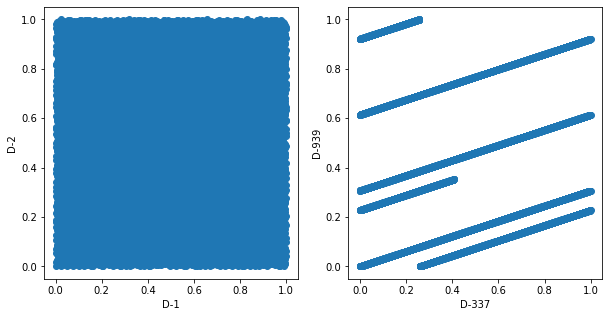

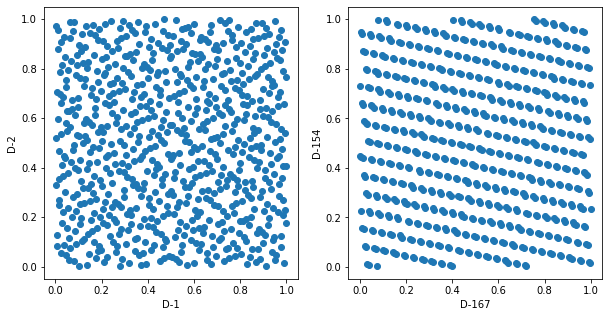

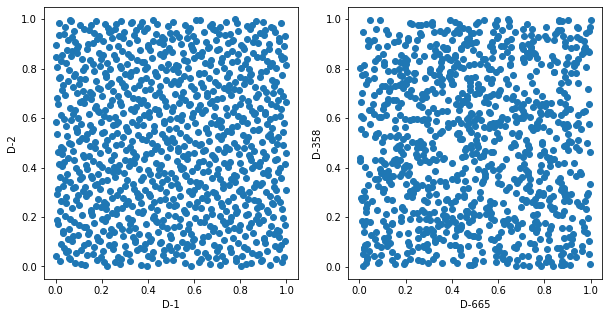

In [3]:
d=1000
n=10*d
halton=qp.Halton(d,randomize=False)
draw()

d=360
n=2*d
halton=qp.Halton(d,randomize='QRNG')
draw()

d=1000
n=d
halton=qp.Halton(d,randomize='OWEN')
draw()